# Assignment 1

First we need to import a few modules, execute the cell below:

In [7]:
import numpy 
import matplotlib.pyplot as plt

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [9]:
def f(x):
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    if type(x) == numpy.ndarray:
        a = []
        for i in range(0,len(x)):
            a.append(numpy.cos(x[i]))
        return a
    else:
        return numpy.cos(x)

You can use the following cell to check that your code works for scalar arguments:

In [85]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [10]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [11]:
def df_analytic(x):
    '''
    The analytic derivative
    '''
    if type(x) == numpy.ndarray:
        a = []
        for i in range(0,len(x)):
            a.append(-numpy.sin(x[i]))
        return a
    else:
        return -numpy.sin(x)

In [69]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [12]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [13]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    if type(x) == numpy.ndarray:
        a = []
        for i in range(0,len(x)):
            a.append((f(x[i])-f(x[i]-dx))/dx)
        return a
    else:    
        df = (f(x)-f(x-dx))/dx
        return df
print(backward_difference(f,0.1,0.0001))

-0.09978366627194646


In [14]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


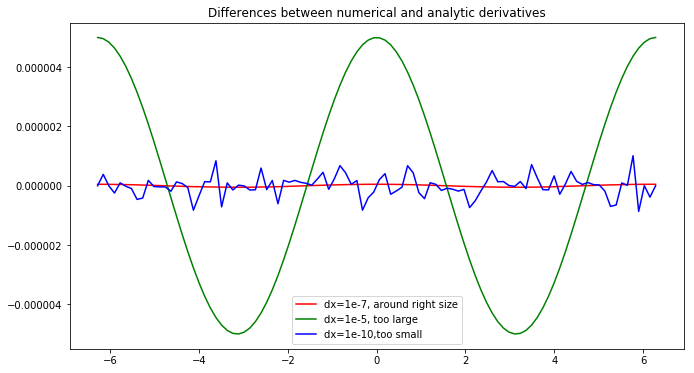

In [53]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = numpy.asarray(backward_difference(f, xs, dx=1e-7))
df_dx_2 = numpy.asarray(backward_difference(f, xs, dx=1e-5))
df_dx_3 = numpy.asarray(backward_difference(f, xs, dx=1e-10))
df_dx_analytical = numpy.asarray(df_analytic(xs))

plt.figure(figsize=(11, 6))
plt.plot(xs, df_dx_1 - df_dx_analytical,'r', label = "dx=1e-7, around right size")
plt.plot(xs, df_dx_2 - df_dx_analytical,'g', label = "dx=1e-5, too large ")
plt.plot(xs, df_dx_3 - df_dx_analytical,'b', label = "dx=1e-10,too small")
plt.title('Differences between numerical and analytic derivatives')
plt.legend()
plt.ylabel(Δx)
plt.xlabel(Δx)

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


When Δx is too small there is a subtraction error; the values in this programme are discrete so the difference between smaller values often results in inaccurate values due to rounding. When Δx is too large the accuracy of the derivative for a given x decreases a lot as the value of the derivative over large values of Δx varies significantly for cosine. 